In [1]:
import sys
sys.path.insert(0, '/home/work/Simulation/G2Ana/SRKAnalysis')
import srkglobal
import srkplotting as spl
import numpy as np
from scipy.optimize import curve_fit
import os

Welcome to JupyROOT 6.12/06


In [120]:
srkglobal.set_computer("home_laptop")

bid = 35
graphs_dir = '/home/work/Simulation/G2Out/graphs/ID'+str(bid)+'/'
if not "ID"+str(bid) in os.listdir('/home/work/Simulation/G2Out/graphs/'):
    os.mkdir(graphs_dir)
srkglobal.set_graphs_dir(graphs_dir)

time_arr = spl.make_timeline(bid)

tree = spl.make_tree_to_array(bid)
#x,y,z,vx,vy,vz,Mx,My,Mz,M,MdotV

In [31]:
def cosinus(t, A, w):
    return A*np.cos(w*t)

def cosinus_off(t, A, w, o):
    return A*np.cos(w*t) + o

def cosinus_full(t, A, w, o, phi):
    return A*np.cos(w*t + phi) + o
theo = 1.6021766208e-19*0.00116592091*1.4513/1.883531594e-28

def sinus(t, A, w):
    return A*np.sin(w*t)

def sinus_off(t, A, w, o):
    return A*np.sin(w*t) + o

def sinus_full(t, A, w, o, phi):
    return A*np.sin(w*t + phi) + o

In [121]:
x = tree[0]
y = tree[1]
z = tree[2]
vx = tree[3]
vy = tree[4]
vz = tree[5]

In [122]:
r = np.sqrt(x**2 + z**2)
r_e = r - 7.112
v_abs = np.sqrt(vx**2 + vz**2)
lab_phi = np.arctan2(z, x)
theta = np.arctan2(-vx, vz)
delta = lab_phi - theta
v_tan = v_abs * np.cos(delta)
v_rad = v_abs * np.sin(delta)

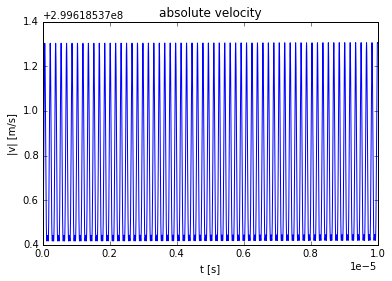

In [123]:
#absolute velocity
spl.plot_single('absolute velocity', v_abs, time_arr, 'both', '|v| [m/s]')

In [80]:
print "Delta v_abs: "+str(v_abs[-1]-v_abs[0])
print "rel error: "+str((v_abs[-1]-v_abs[0])/v_abs[0])

Delta v_abs: 0.474542677402
rel error: 1.58382282182e-09


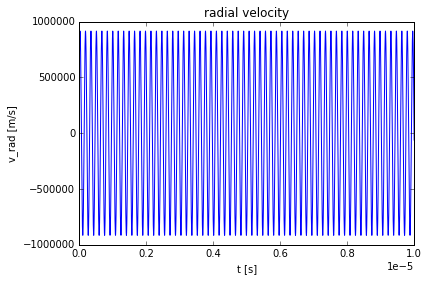

Amplitude: 45877.8720617 +- 9146.26540329
Frequency: 41942266.9093 +- 34534.9328828


In [124]:
#radial velocity
spl.plot_single('radial velocity', v_rad, time_arr, 'both', 'v_rad [m/s]')
#pars, covs = curve_fit(cosinus_full, time_arr, v_rad, [(v_rad.max()-v_rad.min())/2, 4.2e7, 0, 0])
pars, covs = curve_fit(sinus, time_arr, v_rad, [(v_rad.max()-v_rad.min())/2, 4.2e7])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
#v_rad[:100].max()
#print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
#print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))
#spl.plot_comparative('vel rad', [v_rad[:500], sinus(time_arr[:500], (v_rad.max()-v_rad.min())/2, 4.2e7, 0, 0)], time_arr[:500], 'show')

In [48]:
v_tan.min()

299617542.93080175

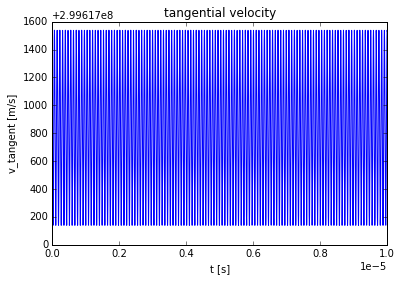

Amplitude: 0.218878485495 +- 1.44891135077
Frequency: 861860156.099 +- 6577320.4527
Offset: 299617838.332 +- 4.94525629185
Phase: 299635811.173 +- 108.909215856


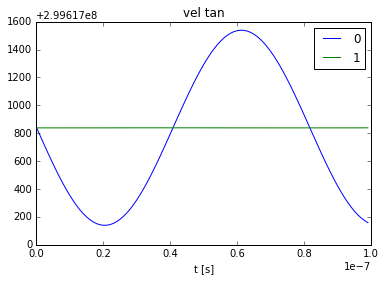

In [125]:
#tangential velocity
spl.plot_single('tangential velocity', v_tan, time_arr, 'both', 'v_tangent [m/s]')
#pars, covs = curve_fit(cosinus_off, time_arr, v_tan, [(v_tan.max()-v_tan.min())/2, 8.426e7, v_tan.mean()])
pars, covs = curve_fit(cosinus_full, time_arr, v_tan, [-(v_tan.max()-v_tan.min())/2, 8.4257491e7, 0, v_tan.mean()])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))
#v_tan[:100].min()
#spl.plot_comparative('vel tan', [v_tan[:500], cosinus_off(time_arr[:500], -(v_tan.max()-v_tan.min())/2, 8.426e7, v_tan.mean())], time_arr[:500], 'show')
spl.plot_comparative('vel tan', [v_tan[:100], cosinus_full(time_arr[:100], pars[0], 84257490, pars[2], pars[3])], time_arr[:100], 'show')

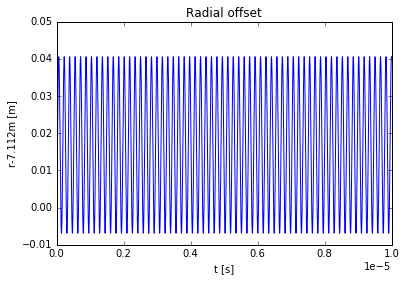

Amplitude: -0.00119175060704 +- 0.000236773888653
Frequency: 42648658.7847 +- 68968.2499754
Offset: 0.0169116305116 +- 0.000167517504519
Phase: -5.50249438171 +- 0.398463533957


In [126]:
#radial offset from magic radius
spl.plot_single('Radial offset', r_e, time_arr, 'both', 'r-7.112m [m]')
#pars, covs = curve_fit(cosinus_off, time_arr, r_e, [-.001, 4.21287e7, 0])
pars, covs = curve_fit(sinus_full, time_arr, r_e, [.001, 4.21287e7, 0, 0])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))

In [127]:
k=2*4.8e6
beta=v_abs.mean()/299792458.
B = 1.4513
R0 = 7.112
n = k*R0/(v_abs.mean()*B)
print "n: "+str(n)
xe2 = r_e**2
print "x_e^2 = "+str(r_e.mean()**2)
print "<x_e^2> = "+str(xe2.mean())
print "<r^2> - R0^2 = "+str((r**2).mean()-7.112**2)
#C_E = -2*n*(1-n)*beta**2 *xe2.mean()/(R0**2)
C_E = -2*n*(1-n)*beta**2 *r_e.mean()**2/(R0**2)
print "C_E in ppb: "+str(C_E*1e9)

n: 0.157013540136
x_e^2 = 0.000286029142558
<x_e^2> = 0.000567270668003
<r^2> - R0^2 = 0.241129193095
C_E in ppb: -1495.23840378


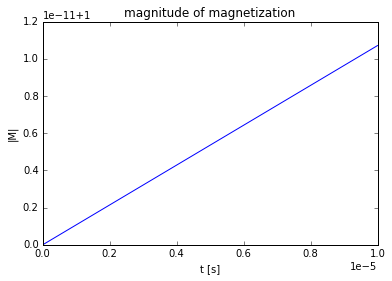

In [57]:
magM = tree[9]
spl.plot_single('magnitude of magnetization', magM, time_arr, 'both', '|M|')

In [58]:
print "Delta magM = rel error: "+str(magM[-1]-magM[0])

Delta magM = rel error: 1.07116537862e-11


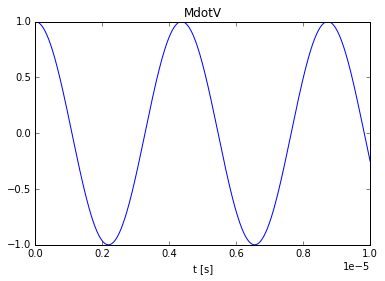

Theo: 1439341.23409
Amplitude: 1.00000000022 +- 5.63539713912e-10
Frequency: 1439339.10348 +- 0.000188735288802
Offset: 1.36318389089e-09 +- 2.47426324817e-10
Phase: 0.00215502515047 +- 1.11691245143e-09
Delta w_a: -2.13061292586
Correction in ppb: -1480.26949787


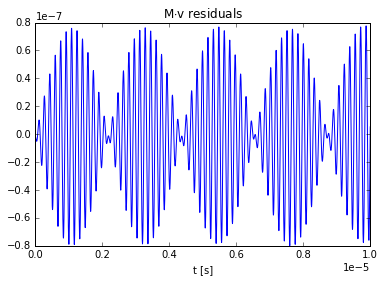

In [128]:
MdotV = tree[10]
spl.plot_single('MdotV', MdotV, time_arr, 'show')
#pars, covs = curve_fit(cosinus, time_arr, MdotV, [1, theo])
pars, covs = curve_fit(cosinus_full, time_arr, MdotV, [1, theo, 0,0])
print "Theo: "+str(theo)
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))
print "Delta w_a: "+str(pars[1]-theo)
print "Correction in ppb: "+str((pars[1]-theo)*1e9/theo)
MdotV[0]
res = MdotV - cosinus_full(time_arr, pars[0], pars[1], pars[2], pars[3])
#res = MdotV - cosinus(time_arr, pars[0], pars[1])
spl.plot_single('M'+r'$\cdot$'+'v residuals', res, time_arr, 'both')
#spl.plot_comparative('Projection', [MdotV[90000:90500], cosinus(time_arr[90000:90500], 1, pars[1]), cosinus(time_arr[90000:90500], 1, theo)], time_arr[90000:90500], 'show')

0.999999003007


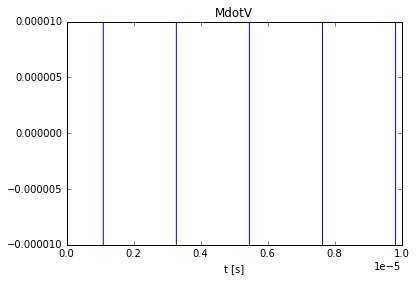

In [75]:
phi_i = np.arctan2(v_rad[0], v_tan[0])
print np.cos(phi_i)
spl.plot_single('MdotV', MdotV, time_arr, 'show', rangeY=(-1e-5, 1e-5))

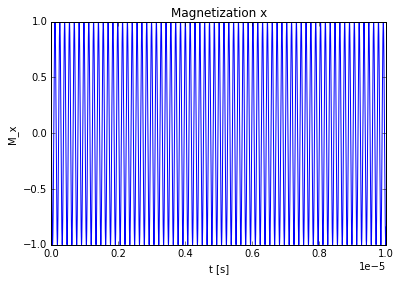

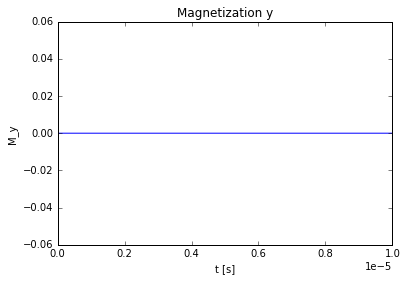

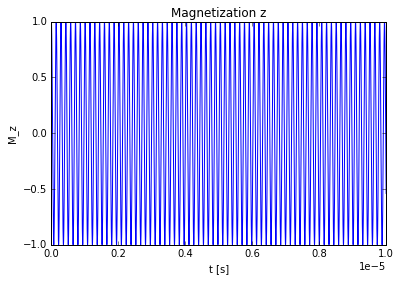

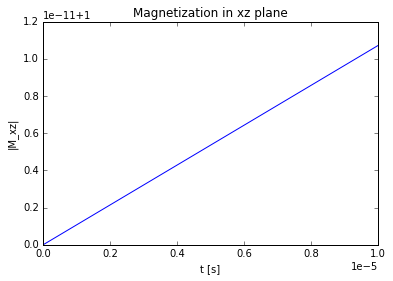

In [65]:
Mx = tree[6]
My = tree[7]
Mz = tree[8]
spl.plot_single('Magnetization x', Mx, time_arr, 'both', 'M_x')
spl.plot_single('Magnetization y', My, time_arr, 'both', 'M_y')
spl.plot_single('Magnetization z', Mz, time_arr, 'both', 'M_z')
Mxz = np.sqrt(Mx**2 + Mz**2)
spl.plot_single('Magnetization in xz plane', Mxz, time_arr, 'both', '|M_xz|')

In [169]:


MV1 = calc_proj(vx1, vy1, vz1, Mx2, My2, Mz2)
MV2 = calc_proj(vx2, vy2, vz2, Mx1, My1, Mz1)

pars_calc1, covs_calc1 = curve_fit(cosinus, time1, MV1, [1, theo, 0])
print pars_calc1[1] - theo
pars_calc2, covs_calc2 = curve_fit(cosinus, time2, MV2, [1, theo, 0])
print pars_calc2[1] - theo

-3.42590038688
21.3588375247


In [69]:
Av = (vxz.max()-vxz.min())/2

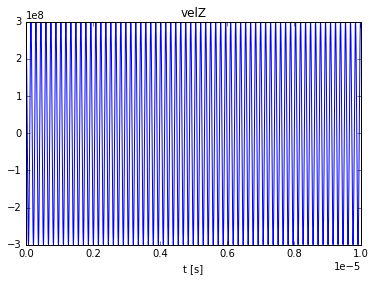

In [134]:
spl.plot_single('velZ', vz, time_arr, 'show')

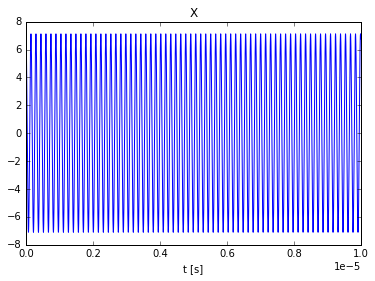

In [6]:
spl.plot_single('X', x, time_arr, 'show')

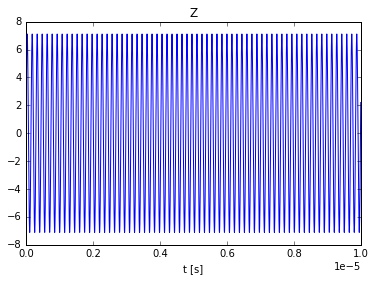

In [137]:
spl.plot_single('Z', z, time_arr, 'show')

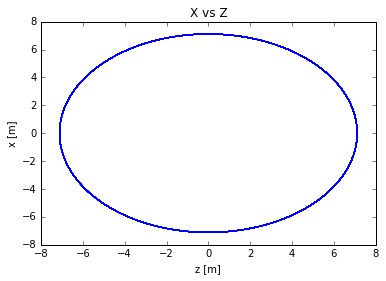

In [7]:
spl.plot_single('X vs Z', x, z, 'both', 'x [m]', 'z [m]')

In [10]:
beta_y = 1.5592e7
ypars, ycovs = curve_fit(cosinus, time_arr, y, [0.01, beta_y])
print ypars, ycovs

[ -9.39041573e-04   1.56843282e+07] [[  9.93772479e-09   9.05718421e-03]
 [  9.05718421e-03   3.36221152e+08]]


In [18]:
index = np.argmax(r>=0)
r[index]
v_abs = vxz[index]
phi = np.arctan2(z[index],x[index])
print phi
theta = np.arctan2(-vx[index], vz[index])
print theta
delta = phi - theta
tan = v_abs * np.cos(delta)
rad = v_abs * np.sin(delta)
print tan, rad
print v_abs, np.sqrt(tan**2 + rad**2)

1.7695544793
1.7694320967
299617839.403 36668.0099668
299617841.646 299617841.646


In [42]:
beta_r = 3.9134e7
rpars, rcovs = curve_fit(cosinus, time_arr, r, [0.01, beta_r])
print rpars, rcovs

[  2.06965775e-04   3.91294312e+07] [[  8.64727298e-11   1.49119721e-04]
 [  1.49119721e-04   6.04497443e+07]]


In [48]:
def lin(xdata, slope, intercept):
    return slope*xdata + intercept

def lin_zero(xdata, slope):
    return slope*xdata

In [ ]:
def sinus(t, A, w):
    return A*np.sin(w*t)
def sinus_dec(t, A, w):
    return (A/t)*np.sin(w*t)
#sinpars, sincovs = curve_fit(sinus, time_arr, abs_phi[0][0], [7.0773e-6, 1.1466e09])
#print sinpars, sincovs

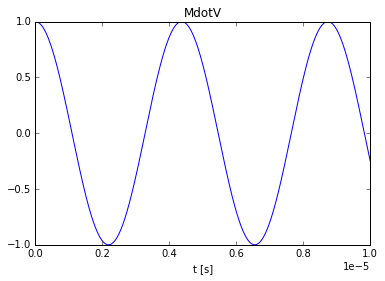

Amplitude: 1.0 +- 1.61250771051e-16
Frequency: 1439000.0 +- 5.41135992105e-11
Delta w_a: -341.234093158
Correction in ppb: -237076.57717


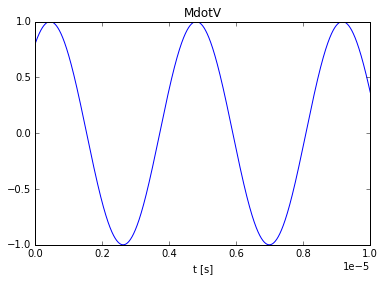

Amplitude: 1.0 +- 1.70621830391e-16
Frequency: 1439000.0 +- 6.67615997646e-11
Offset: 5.89166172381e-16 +- 1.26065717008e-16
Phase: -0.628318530718 +- 3.83273952092e-16
Delta w_a: -341.234093155
Correction in ppb: -237076.577167


0.62831853071795862

In [37]:
test1x = np.cos(4.2125e7*time_arr)
test1y = 0*time_arr
test1z = np.sin(4.2125e7*time_arr)

test2x = np.cos(4.0686e7*time_arr)
test2y = 0*time_arr
test2z = np.sin(4.0686e7*time_arr)

test3x = np.cos(4.0686e7*time_arr + np.pi/5)
test3y = 0*time_arr
test3z = np.sin(4.0686e7*time_arr + np.pi/5)
                
def magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def calc_proj(vx, vy, vz, Mx, My, Mz):
    return (vx*Mx + vy*My + vz*Mz)/(magnitude(vx, vy, vz) * magnitude(Mx, My, Mz))
                
Dot1 = calc_proj(test1x, test1y, test1z, test2x, test2y, test2z)
Dot2 = calc_proj(test1x, test1y, test1z, test3x, test3y, test3z)
                
spl.plot_single('MdotV', Dot1, time_arr, 'show')
pars, covs = curve_fit(cosinus_full, time_arr, Dot1, [1, 1.439e6, 0, 0])
#pars, covs = curve_fit(cosinus_full, time_arr, MdotV, [1, theo, 0,0])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Delta w_a: "+str(pars[1]-theo)
print "Correction in ppb: "+str((pars[1]-theo)*1e9/theo)

def cosinus_phase(t, A, w):
    return A*np.cos(w*t - np.pi/5)

spl.plot_single('MdotV', Dot2, time_arr, 'show')
#pars, covs = curve_fit(cosinus, time_arr, Dot1, [1, theo])
#pars, covs = curve_fit(cosinus_phase, time_arr, MdotV, [1, 1.439e6])
pars, covs = curve_fit(cosinus_full, time_arr, Dot2, [1, 1.439e6, 0, -np.pi/5])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))
print "Delta w_a: "+str(pars[1]-theo)
print "Correction in ppb: "+str((pars[1]-theo)*1e9/theo)
np.pi/5
np.arccos(Dot2[0])